In [1]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, kde, kstest, stats
from numpy import inf
import math
import datetime as dt




%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\5Attributes.csv"
data = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [2]:
fa =data[['time','emails_received','emails_sent','inbound_rejected_emails','inbound_spam_emails','inbound_non_spam_emails']].copy()

In [3]:
fa.dtypes

time                        object
emails_received            float64
emails_sent                float64
inbound_rejected_emails    float64
inbound_spam_emails        float64
inbound_non_spam_emails    float64
dtype: object

In [4]:
fa = fa[(fa['emails_received'] > 0) & (fa['emails_sent'] > 0)]

In [5]:
fa.describe()

,emails_received,emails_sent,inbound_rejected_emails,inbound_spam_emails,inbound_non_spam_emails
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,280777.733245,27640.608255,16359.610732,44881.585443,162224.669489
std,115061.189654,15934.070536,18467.968100,20259.423457,55414.084296
min,74919.000000,1181.000000,0.000000,9578.000000,50814.000000
25%,175836.500000,11993.250000,4579.500000,28067.000000,116544.500000
50%,267138.000000,28110.000000,8200.000000,44169.000000,162347.500000
75%,383972.500000,43539.250000,25843.250000,60944.500000,201831.750000
max,648823.000000,56768.000000,144169.000000,127402.000000,442820.000000


In [6]:
fa['time'] = pd.to_datetime(fa['time'],utc=True)
fa.set_index('time', inplace=True)

In [7]:
fa

,emails_received,emails_sent,inbound_rejected_emails,inbound_spam_emails,inbound_non_spam_emails
time,,,,,
2015-03-23 04:00:00+00:00,474483.000000,52537.000000,2.000000,31718.000000,177446.000000
2015-03-24 04:00:00+00:00,378195.000000,48970.000000,6.000000,50873.000000,163005.000000
2015-03-25 04:00:00+00:00,423666.000000,48640.000000,6.000000,49373.000000,155603.000000
2015-03-26 04:00:00+00:00,405663.000000,45833.000000,790.000000,46494.000000,158907.000000
2015-03-27 04:00:00+00:00,342226.000000,37168.000000,13.000000,34066.000000,137505.000000
2015-03-28 04:00:00+00:00,154766.000000,10934.000000,6.000000,22205.000000,97453.000000
2015-03-29 04:00:00+00:00,162389.000000,17119.000000,9.000000,22798.000000,87480.000000
2015-03-30 04:00:00+00:00,407661.000000,54089.000000,10.000000,47344.000000,171697.000000
2015-03-31 04:00:00+00:00,465110.000000,51526.000000,6.000000,97464.000000,183266.000000


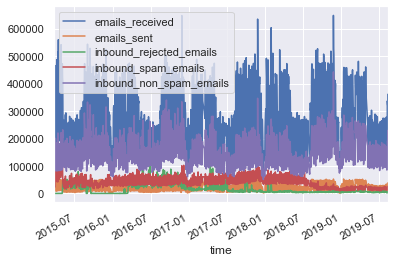

In [8]:
fa.plot()
#fa.plot(figsize=(400,600));

Chi test to test for independence for each attribute in the table

In [9]:
import scipy 
scipy.stats.chi2_contingency(observed = fa)

(49920793.50431393,
 0.0,
 6172,
 array([[388627.13640007,  38257.62930141,  22643.49312156,
          62121.03013394, 224536.71104302],
        [338405.01878891,  33313.61232901,  19717.28424893,
          54093.15614034, 195519.92849282],
        [357535.31846318,  35196.85681919,  20831.91770736,
          57151.08445061, 206572.82255966],
        ...,
        [348308.2838318 ,  34288.51965636,  20294.30137634,
          55676.16712576, 201241.72800975],
        [297096.89550153,  29247.1158859 ,  17310.45230665,
          47490.16079812, 171653.3755078 ],
        [165358.65947922,  16278.40596706,   9634.67889348,
          26432.14872634,  95539.10693391]]))

The pvalue returns from the chi test for independence is 0.0, which indicates that the p value was really small it was rounded down. Thus this test result shows there is a significant relationship between the attributes.

Since we are dealing with a time series, linear regression will not work. We have to use autoregression. It works like linear but linear regression models forecast a variable using a linear combination of predictors, whereas autoregressive models use a combination of past values of the variable.
 

In [10]:
#fa1 =data[['time','emails_received','emails_sent','inbound_rejected_emails','inbound_spam_emails','inbound_non_spam_emails']].copy()
#fa1 = fa1[(fa1['emails_received'] > 0) & (fa1['emails_sent'] > 0)]
fa2 = fa[['emails_received']]
#fa2['time'] = pd.to_datetime(fa2['time'],utc=True)
fa2

,emails_received
time,
2015-03-23 04:00:00+00:00,474483.000000
2015-03-24 04:00:00+00:00,378195.000000
2015-03-25 04:00:00+00:00,423666.000000
2015-03-26 04:00:00+00:00,405663.000000
2015-03-27 04:00:00+00:00,342226.000000
2015-03-28 04:00:00+00:00,154766.000000
2015-03-29 04:00:00+00:00,162389.000000
2015-03-30 04:00:00+00:00,407661.000000
2015-03-31 04:00:00+00:00,465110.000000


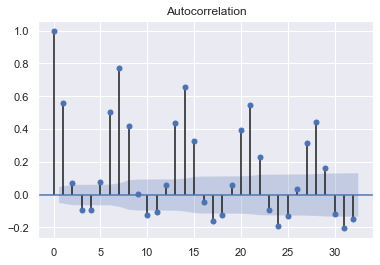

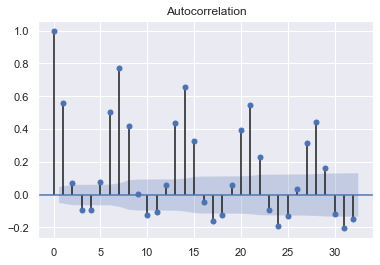

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(fa2)
#pd.plotting.autocorrelation_plot(fa2['emails_received'])

Text(0.5, 0, 'Year')

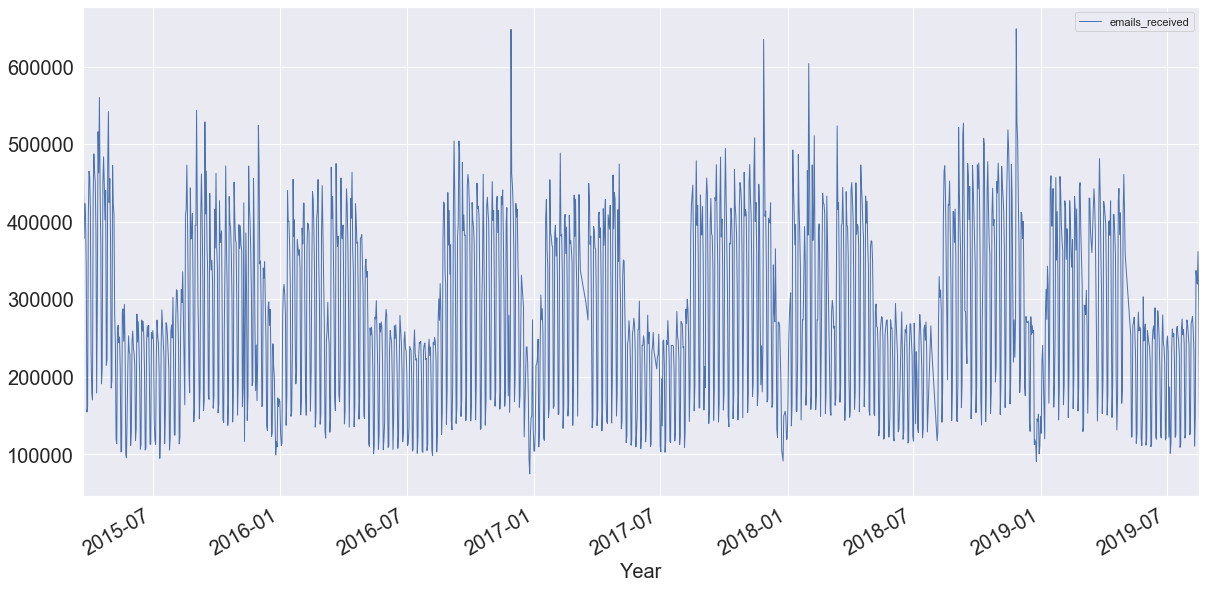

In [12]:
#fa2.set_index('time', inplace=True)
fa2.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

AR only works for stationary model so we must test if the data is stationary or not. This data kinda looks stationary, maybe a adfuller test will confirm it

In [13]:
from statsmodels.tsa.stattools import adfuller
x = fa2.iloc[:,0].values
adfuller(x)

(-5.3288894852763375,
 4.769488560827956e-06,
 21,
 1522,
 {'1%': -3.4346537865963596,
  '5%': -2.8634408535813285,
  '10%': -2.5677819879092625},
 37841.51333603184)

The p value is cell then 0.05 thus we reject the null hypothesis, which means this time series is stationary. We can move on to autoregression. 

In [14]:
x = fa2.values
train = x[0:1235]
test = x[1235:]
predictions = []
x.size

1544

In [15]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model = AR(test)
model_fitted = model.fit()
 

In [20]:
predictions = model_fitted.predict(start = 1236, end = 1545)

ValueError: end is before start

In [ ]:
plt.plot(test)
plt.plot(predictions, color = 'red')

In [ ]:

from matplotlib import pyplot
pyplot.plot(fa2)
pyplot.plot(predictions, color='red')
plt.figure(figsize=(200,10))
pyplot.show()

This is early stages of forcasting with AR.
https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
https://machinelearningmastery.com/time-series-data-stationary-python/
https://pythondata.com/forecasting-time-series-autoregression/

Might play with ARIMA 
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [ ]:

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], fa2.emails_received[i]))

Code I found to test adfuller, found it on this website
https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q

In [ ]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [ ]:
test_stationarity(fa2['emails_received'])

# Arima Model 

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
model_arima = ARIMA(train,order = (1,0,1))
model_arima_fit = model_arima.fit()

In [26]:
#predictions = model_arima_fit.forecast(steps = 309)[0]
predictions = model_arima_fit.forecast(steps = 309)[0]

In [27]:
predictions

array([436771.82059698, 318723.3050671 , 289464.37214427, 282212.39483697,
       280414.95488917, 279969.45013522, 279859.02948609, 279831.66115917,
       279824.8777783 , 279823.1964824 , 279822.77976454, 279822.67647888,
       279822.65087899, 279822.64453393, 279822.64296127, 279822.64257148,
       279822.64247487, 279822.64245092, 279822.64244499, 279822.64244352,
       279822.64244315, 279822.64244306, 279822.64244304, 279822.64244303,
       279822.64244303, 279822.64244303, 279822.64244303, 279822.64244303,
       279822.64244303, 279822.64244303, 279822.64244303, 279822.64244303,
       279822.64244303, 279822.64244303, 279822.64244303, 279822.64244303,
       279822.64244303, 279822.64244303, 279822.64244303, 279822.64244303,
       279822.64244303, 279822.64244303, 279822.64244303, 279822.64244303,
       279822.64244303, 279822.64244303, 279822.64244303, 279822.64244303,
       279822.64244303, 279822.64244303, 279822.64244303, 279822.64244303,
       279822.64244303, 2

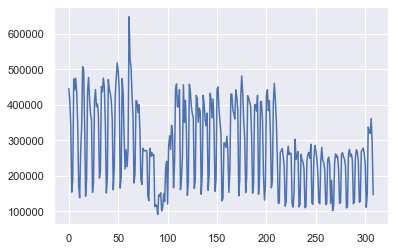

In [29]:
plt.plot(test)
#plt.plot(predictions, color='red')